<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/Transfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")

#Data Preprocessing

In [3]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_fish_224_11k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
ilish_pic= os.listdir('/content/ilish/')
print(ilish_pic[0:5])
print(ilish_pic[-5:])
chandana_pic= os.listdir('/content/chandana/')
sardin_pic= os.listdir('/content/sardin/')
sardinella_pic= os.listdir('/content/sardinella/')
punctatus_pic= os.listdir('/content/punctatus/')

['1581.webp', '550.webp', '1939.webp', '1804.webp', '3006.webp']
['1886.webp', '371.webp', '475.webp', '111.webp', '3033.webp']


In [5]:
print('ilish   images:', len(ilish_pic))
print('chandana  images:', len(chandana_pic))
print('sardin   images:', len(sardin_pic))
print('sardinella  images:', len(sardinella_pic))
print('punctatus images:', len(punctatus_pic))

ilish   images: 3500
chandana  images: 2000
sardin   images: 3000
sardinella  images: 1000
punctatus images: 1500


In [6]:
ilish_pic_labels = [0]*len(ilish_pic)
chandana_pic_labels = [1]*len(chandana_pic)
sardin_pic_labels = [2]*len(sardin_pic)
sardinella_pic_labels = [3]*len(sardinella_pic)
punctatus_pic_labels = [4]*len(punctatus_pic)


print(ilish_pic_labels[0:5])

print(chandana_pic_labels[0:5])

print(sardin_pic_labels[0:5])

print(sardinella_pic_labels[0:5])

print(punctatus_pic_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]


In [7]:
labels = ilish_pic_labels + chandana_pic_labels + sardin_pic_labels + sardinella_pic_labels + punctatus_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

11000
[0, 0, 0, 0, 0]
[4, 4, 4, 4, 4]


In [8]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
ilish_image_number = len(ilish_pic)
chandana_image_number = len(chandana_pic)
sardin_image_number = len(sardin_pic)
sardinella_image_number = len(sardinella_pic)
punctatus_image_number = len(punctatus_pic)


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/ilish/', ilish_image_number))
data.extend(process_images('/content/chandana/', chandana_image_number))
data.extend(process_images('/content/sardin/', sardin_image_number))
data.extend(process_images('/content/sardinella/', sardinella_image_number))
data.extend(process_images('/content/punctatus/', punctatus_image_number))

In [9]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

Class counts: {0: 3500, 1: 2000, 2: 3000, 3: 1000, 4: 1500}
(11000, 224, 224, 3)
(11000,)


(11000, 224, 224, 3) (8800, 224, 224, 3) (2200, 224, 224, 3)


array([[[234, 246, 213],
        [ 78, 255, 161],
        [161, 255, 254],
        ...,
        [200, 158, 255],
        [245, 220, 235],
        [130, 237, 224]],

       [[255, 181, 183],
        [234, 228, 200],
        [184, 248, 234],
        ...,
        [234, 166, 255],
        [198, 206, 134],
        [228, 189, 216]],

       [[182, 198, 211],
        [198, 185, 251],
        [222, 230, 235],
        ...,
        [206, 197, 255],
        [238, 169, 255],
        [198, 149, 247]],

       ...,

       [[252, 255, 143],
        [233, 237, 231],
        [244, 199, 215],
        ...,
        [255, 175, 164],
        [202, 211, 148],
        [204, 221,  81]],

       [[245, 170, 194],
        [186, 255, 194],
        [250, 244, 143],
        ...,
        [212, 129, 184],
        [171, 185, 168],
        [147, 227, 169]],

       [[163, 170, 130],
        [187, 202, 209],
        [249, 172, 230],
        ...,
        [186,  72, 175],
        [239, 147, 143],
        [235, 246, 218]]], dtype=uint8)
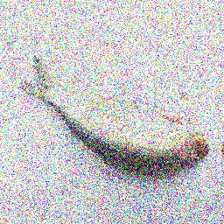

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

#Optuna-Hyper parameter Training

In [ ]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [ ]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")


In [ ]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Ensemble Learning

##1.[Resnet50+InceptionV3+EfficientNetB0]

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana','Sardin', 'Sardinella', '', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

inception_model = create_model(InceptionV3)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

efficientnet_model = create_model(EfficientNetB0)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == inception_preds_prob.shape == efficientnet_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + inception_preds_prob + efficientnet_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")



def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history, class_labels):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # ROC Curve
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        axes[0, 0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    axes[0, 0].plot([0, 1], [0, 1], 'k--')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].legend()
    axes[0, 0].grid()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axes[0, 1])
    axes[0, 1].set_title('Confusion Matrix')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Actual')

    # Precision-Recall Curve
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        axes[1, 0].plot(recall, precision, label=f'Class {i}')
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid()

    # Training Accuracy & Loss Curves
    ax2 = axes[1, 1].twinx()
    axes[1, 1].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    axes[1, 1].plot(history.history['val_accuracy'], label='Val Accuracy', color='cyan')
    ax2.plot(history.history['loss'], label='Train Loss', linestyle='dashed', color='red')
    ax2.plot(history.history['val_loss'], label='Val Loss', linestyle='dashed', color='orange')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')
    axes[1, 1].set_title('Training Accuracy & Loss')
    axes[1, 1].legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")



2.[Resnet+Inception+EfficientNet]

Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4384 - loss: 1.5442

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.4390 - loss: 1.5425 - val_accuracy: 0.2937 - val_loss: 2.2809 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6476 - loss: 0.9844

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6478 - loss: 0.9839 - val_accuracy: 0.6552 - val_loss: 0.9625 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7093 - loss: 0.7880 - val_accuracy: 0.2484 - val_loss: 2.7959 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7644 - loss: 0.6614 - val_accuracy: 0.4875 - val_loss: 2.8798 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7894 - loss: 0.6087 - val_accuracy: 0.5047 - val_loss: 1.6461 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8202 - loss: 0.5069 - val_accuracy: 0.4573 - val_loss: 1.8107 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8437 - loss: 0.4581 - val_accuracy: 0.5078 - val_loss: 2.1851 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accurac

240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4839 - loss: 1.4319 - val_accuracy: 0.8474 - val_loss: 0.4441 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8776 - loss: 0.3716 - val_accuracy: 0.8401 - val_loss: 0.4482 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9331 - loss: 0.1973

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9332 - loss: 0.1973 - val_accuracy: 0.8984 - val_loss: 0.3179 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9579 - loss: 0.1274

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9579 - loss: 0.1273 - val_accuracy: 0.9187 - val_loss: 0.2723 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9717 - loss: 0.0810

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9717 - loss: 0.0811 - val_accuracy: 0.9448 - val_loss: 0.1625 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9856 - loss: 0.0538 - val_accuracy: 0.9333 - val_loss: 0.2095 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9886 - loss: 0.0394 - val_accuracy: 0.9104 - val_loss: 0.2889 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9411 - val_loss: 0.2068 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9344 - val_loss: 0.2038 - learning_rate: 1.0000e-04
Epoch 10/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9914 - loss: 0.0259

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9563 - val_loss: 0.1606 - learning_rate: 1.0000e-04
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.1974 - loss: 2.0984 - val_accuracy: 0.1594 - val_loss: 1.8717 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2205 - loss: 1.9336 - val_accuracy: 0.1651 - val_loss: 1.6089 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2235 - loss: 1.8761 - val_accuracy: 0.3135 - val_loss: 1.5451 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2397 - loss: 1.8359 - val_accuracy: 0.1620 - val_loss: 1.5961 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2382 - loss: 1.8136 - val_accuracy: 0.3156 - val_loss: 1.5393 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2

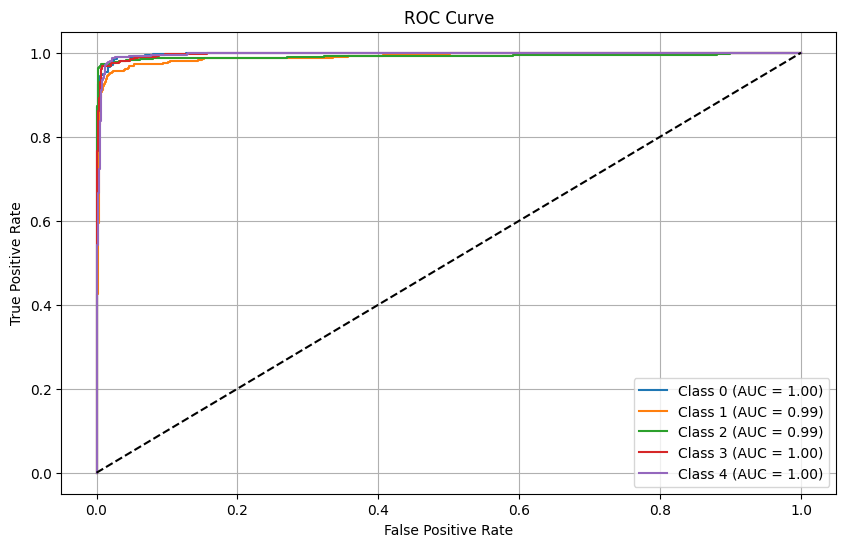

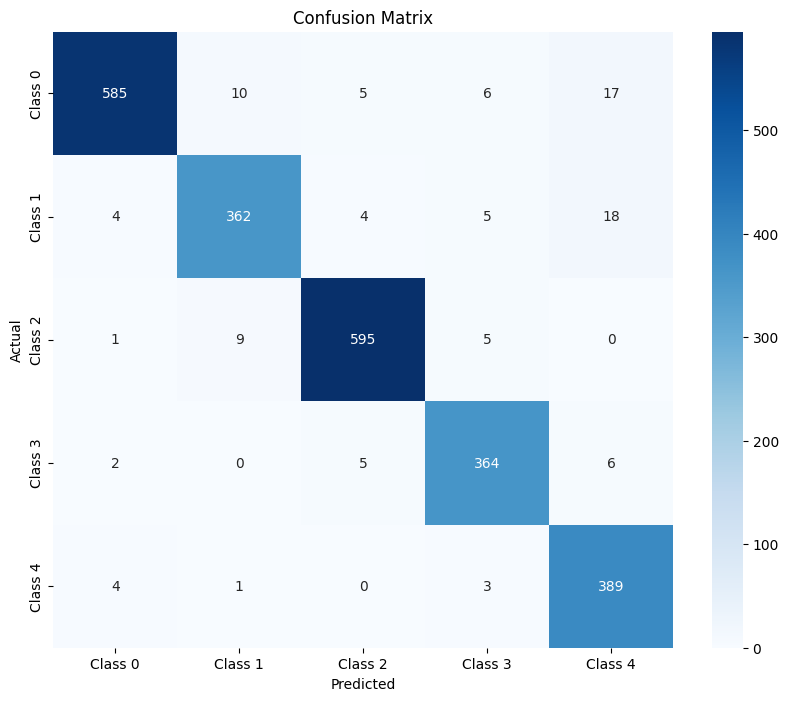

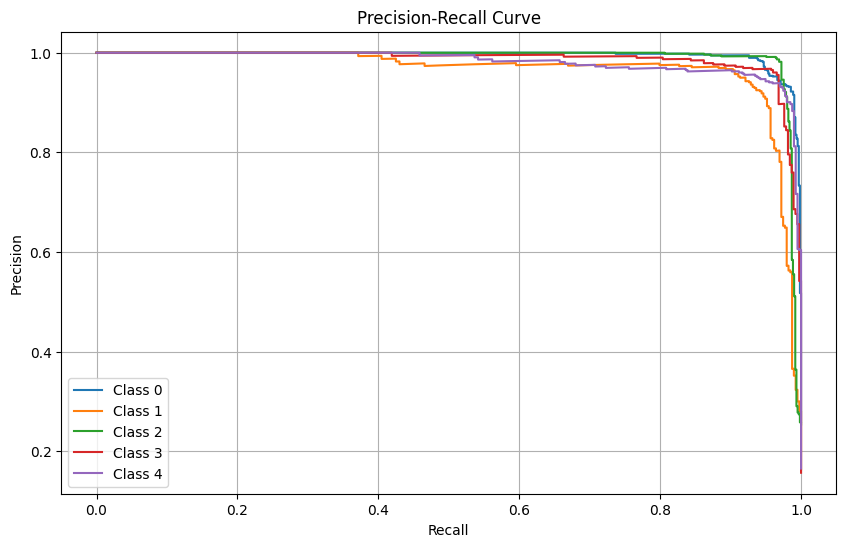

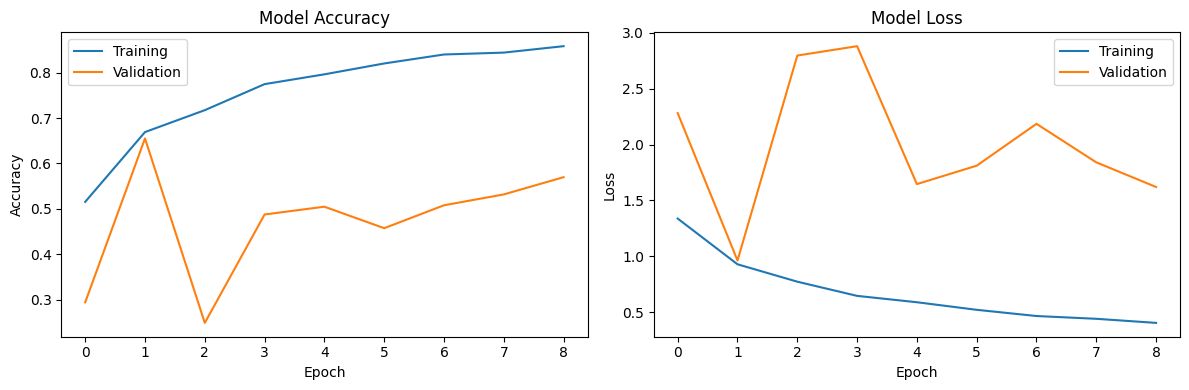


Final Model Performance:
Test Accuracy: 0.9563
F1 Score: 0.9563
Final predictions evaluated.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana','Sardin', 'Sardinella', '', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

inception_model = create_model(InceptionV3)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

efficientnet_model = create_model(EfficientNetB0)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == inception_preds_prob.shape == efficientnet_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + inception_preds_prob + efficientnet_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")


##3.[Resnet+DenseNet+Vgg19]

Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4386 - loss: 1.5406

240/240 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.4392 - loss: 1.5391 - val_accuracy: 0.2807 - val_loss: 2.7375 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6393 - loss: 0.9958

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.6395 - loss: 0.9953 - val_accuracy: 0.5068 - val_loss: 2.6224 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7125 - loss: 0.8107

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.7126 - loss: 0.8103 - val_accuracy: 0.7604 - val_loss: 0.6663 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7650 - loss: 0.6547 - val_accuracy: 0.5510 - val_loss: 1.6349 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8000 - loss: 0.5632 - val_accuracy: 0.4109 - val_loss: 2.2821 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8248 - loss: 0.5005 - val_accuracy: 0.1865 - val_loss: 9.0918 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8349 - loss: 0.4712 - val_accuracy: 0.4911 - val_loss: 3.0303 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8499 - loss: 0.4330 - val_accuracy: 0.5057 - val_loss: 2.3005 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accurac

240/240 ━━━━━━━━━━━━━━━━━━━━ 56s 104ms/step - accuracy: 0.5691 - loss: 1.1884 - val_accuracy: 0.9130 - val_loss: 0.2735 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9178 - loss: 0.2405

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9179 - loss: 0.2403 - val_accuracy: 0.9563 - val_loss: 0.1283 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9530 - loss: 0.1389

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9530 - loss: 0.1388 - val_accuracy: 0.9578 - val_loss: 0.1186 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9786 - loss: 0.0775

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9787 - loss: 0.0774 - val_accuracy: 0.9703 - val_loss: 0.0889 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9882 - loss: 0.0408 - val_accuracy: 0.9672 - val_loss: 0.0996 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0.9672 - val_loss: 0.0918 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9932 - loss: 0.0268 - val_accuracy: 0.9635 - val_loss: 0.1088 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9943 - loss: 0.0224 - val_accuracy: 0.9672 - val_loss: 0.1022 - learning_rate: 1.0000e-04
Epoch 9/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9953 - loss: 0.0164

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.9719 - val_loss: 0.0780 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9740 - val_loss: 0.0805 - learning_rate: 1.0000e-04
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 59s 178ms/step - accuracy: 0.3332 - loss: 1.7672 - val_accuracy: 0.1896 - val_loss: 6.6072 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.6258 - loss: 1.0024 - val_accuracy: 0.5089 - val_loss: 1.5669 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.7891 - loss: 0.6237 - val_accuracy: 0.6177 - val_loss: 1.1037 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.8575 - loss: 0.4208 - val_accuracy: 0.7432 - val_loss: 0.6982 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - a

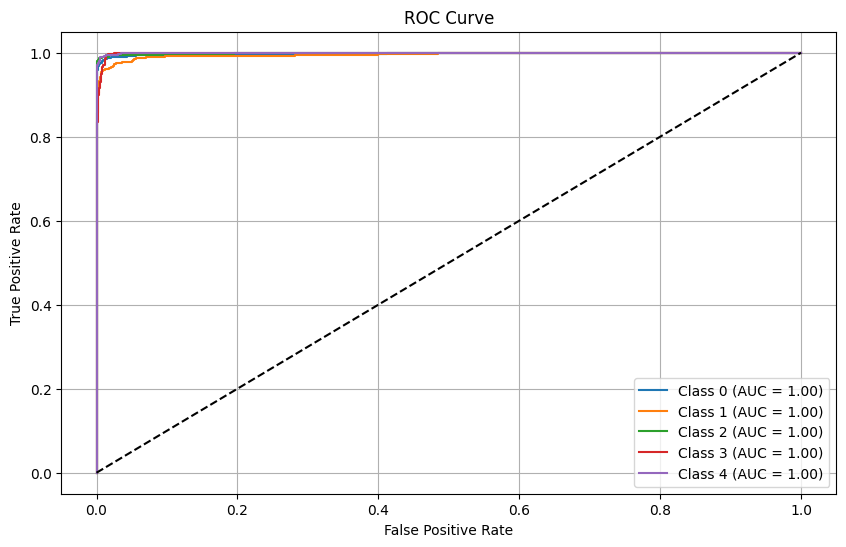

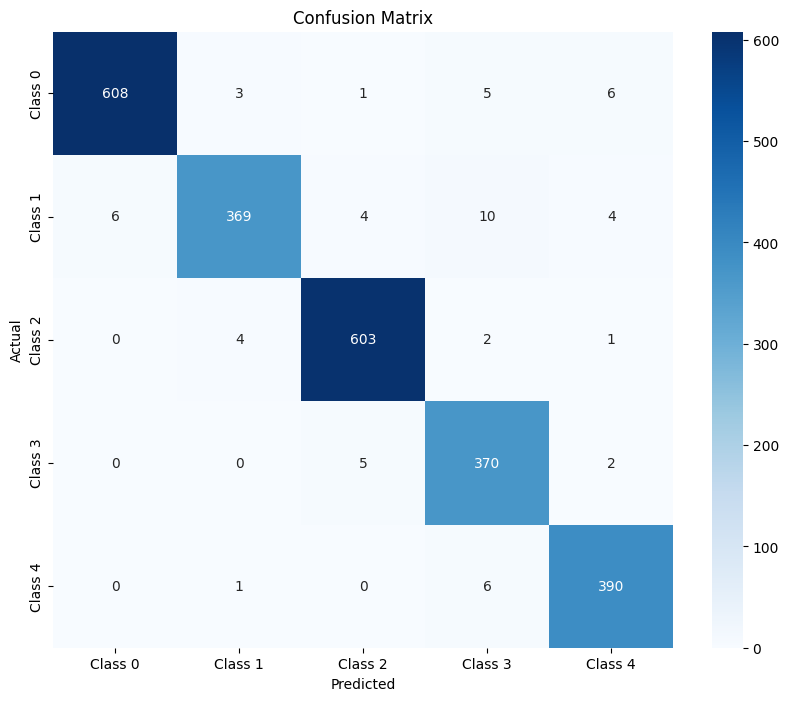

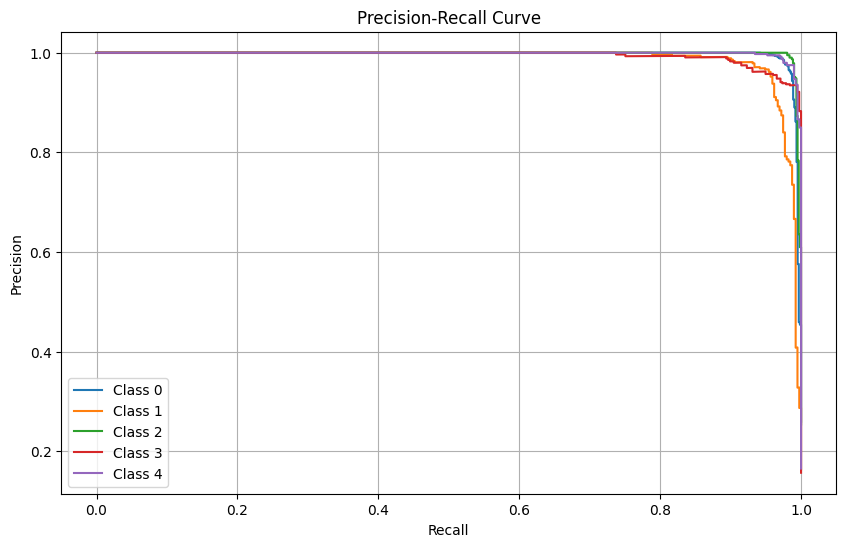

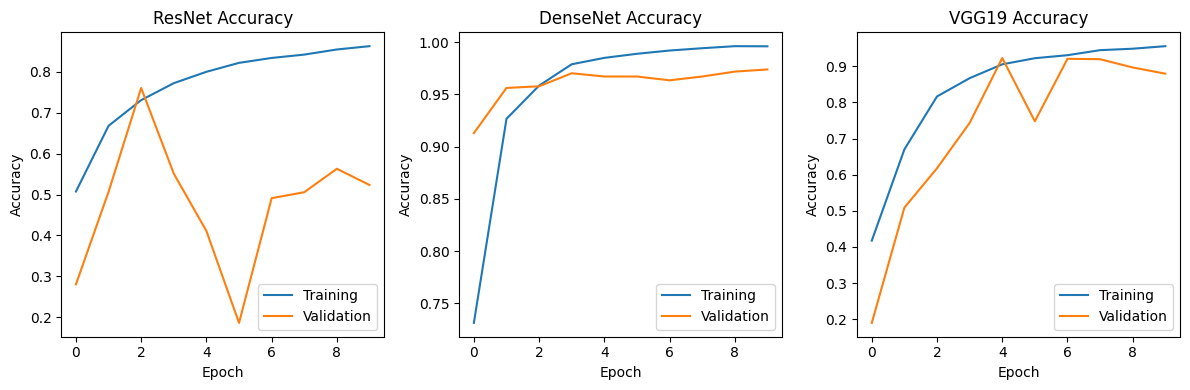


Final Model Performance:
Test Accuracy: 0.9750
F1 Score: 0.9750
Final predictions evaluated.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, DenseNet121, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

densenet_model = create_model(DenseNet121)
history_densenet = densenet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

vgg19_model = create_model(VGG19)
history_vgg19 = vgg19_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
densenet_preds_prob = densenet_model.predict(X_test_scaled)
vgg19_preds_prob = vgg19_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == densenet_preds_prob.shape == vgg19_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + densenet_preds_prob + vgg19_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history_resnet, history_densenet, history_vgg19):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves for all models
    plt.figure(figsize=(12, 4))

    # ResNet
    plt.subplot(1, 3, 1)
    plt.plot(history_resnet.history['accuracy'], label='Training')
    plt.plot(history_resnet.history['val_accuracy'], label='Validation')
    plt.title('ResNet Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # DenseNet
    plt.subplot(1, 3, 2)
    plt.plot(history_densenet.history['accuracy'], label='Training')
    plt.plot(history_densenet.history['val_accuracy'], label='Validation')
    plt.title('DenseNet Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # VGG19
    plt.subplot(1, 3, 3)
    plt.plot(history_vgg19.history['accuracy'], label='Training')
    plt.plot(history_vgg19.history['val_accuracy'], label='Validation')
    plt.title('VGG19 Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet, history_densenet, history_vgg19)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

4. Pretrained Models = ['ResNet50', 'InceptionV3','EfficientNetB0', 'VGG16', 'MobileNetV2', 'DenseNet121', 'Xception']


Training ResNet50...
Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4361 - loss: 1.5299

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.4368 - loss: 1.5279 - val_accuracy: 0.2375 - val_loss: 4.3875 - learning_rate: 1.0000e-04
Epoch 2/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6472 - loss: 0.9657

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6474 - loss: 0.9652 - val_accuracy: 0.2656 - val_loss: 4.2672 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7339 - loss: 0.7533

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.7339 - loss: 0.7532 - val_accuracy: 0.2927 - val_loss: 2.9150 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7767 - loss: 0.6259

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.7767 - loss: 0.6259 - val_accuracy: 0.8271 - val_loss: 0.5025 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8062 - loss: 0.5567 - val_accuracy: 0.4531 - val_loss: 3.4985 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8066 - loss: 0.5249 - val_accuracy: 0.1615 - val_loss: 10.4136 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8217 - loss: 0.4991 - val_accuracy: 0.4719 - val_loss: 2.8860 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8502 - loss: 0.4258 - val_accuracy: 0.6177 - val_loss: 1.4253 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8549 - loss: 0.4172 - val_accuracy: 0.6729 - val_loss: 2.2628 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accur

240/240 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.5472 - loss: 1.2197 - val_accuracy: 0.8776 - val_loss: 0.4105 - learning_rate: 1.0000e-04
Epoch 2/10
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8768 - loss: 0.3578

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8770 - loss: 0.3574 - val_accuracy: 0.8990 - val_loss: 0.2839 - learning_rate: 1.0000e-04
Epoch 3/10
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9472 - loss: 0.1733

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9472 - loss: 0.1734 - val_accuracy: 0.9089 - val_loss: 0.2759 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9689 - loss: 0.1033

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9689 - loss: 0.1033 - val_accuracy: 0.9443 - val_loss: 0.1818 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9765 - loss: 0.0774 - val_accuracy: 0.9333 - val_loss: 0.2189 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9000 - val_loss: 0.3486 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9863 - loss: 0.0407 - val_accuracy: 0.9208 - val_loss: 0.2822 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9871 - loss: 0.0364 - val_accuracy: 0.9448 - val_loss: 0.2046 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9328 - val_loss: 0.2731 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9759 - loss: 0.0726 - val_accuracy: 0.9526 - val_loss: 0.1529 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9811 - loss: 0.0534

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9811 - loss: 0.0534 - val_accuracy: 0.9745 - val_loss: 0.0981 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9855 - loss: 0.0459

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9855 - loss: 0.0459 - val_accuracy: 0.9682 - val_loss: 0.0937 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9883 - loss: 0.0383

240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9750 - val_loss: 0.0723 - learning_rate: 1.0000e-04
VGG16 validation accuracy: 0.9750
Training MobileNetV2...
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.5999 - loss: 1.0620 - val_accuracy: 0.7651 - val_loss: 0.7083 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9008 - loss: 0.2751 - val_accuracy: 0.8083 - val_loss: 0.5520 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9250 - loss: 0.2040 - val_accuracy: 0.8411 - val_loss: 0.4764 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9463 - loss: 0.1469 - val_accuracy: 0.8979 - val_loss: 0.2839 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9548 - loss: 0.1282 - val_accuracy: 0.9021 - val_loss: 0.2688 - learning_rate: 1.0000e-04
Epoch 6/

240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9833 - val_loss: 0.0701 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9970 - loss: 0.0107

240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9970 - loss: 0.0107 - val_accuracy: 0.9849 - val_loss: 0.0689 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9963 - loss: 0.0098 - val_accuracy: 0.9693 - val_loss: 0.1258 - learning_rate: 1.0000e-04
Xception validation accuracy: 0.9693
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step
Final predictions shape: (2400,)


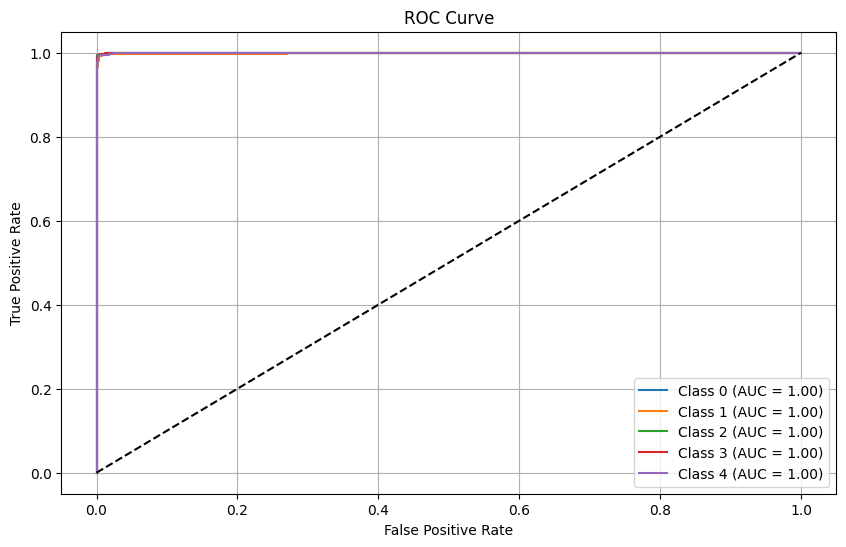

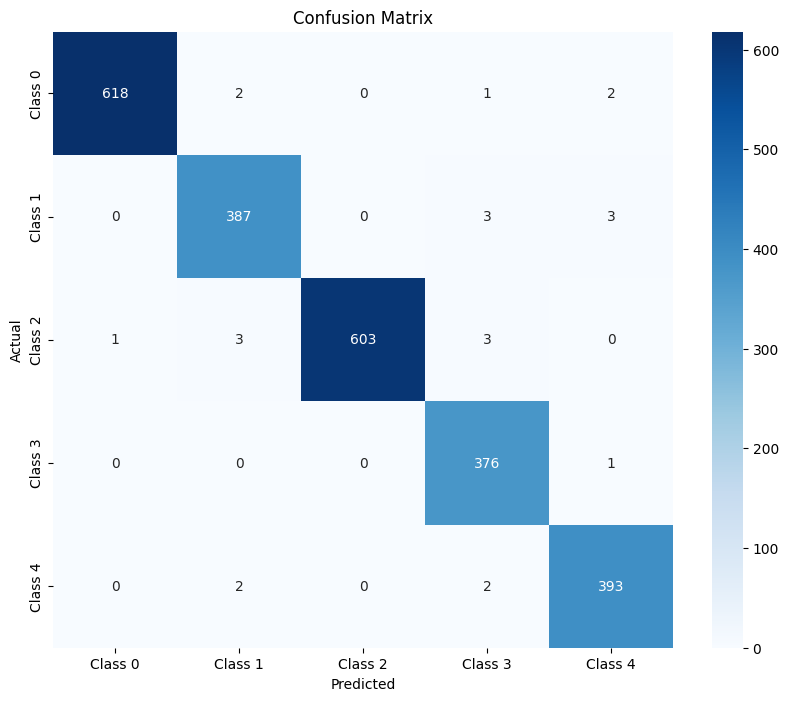

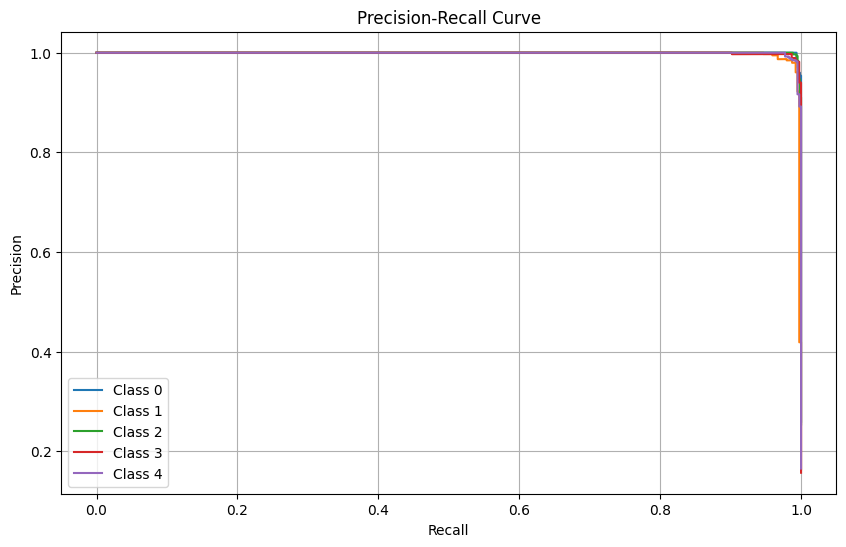

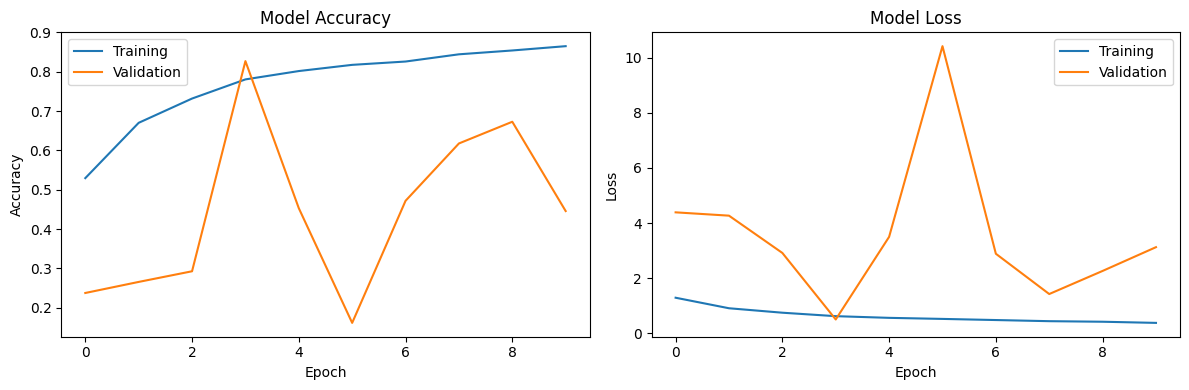


Final Model Performance:
Test Accuracy: 0.9904
F1 Score: 0.9904
Final predictions evaluated.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture
models = {
    'ResNet50': create_model(ResNet50),
    'InceptionV3': create_model(InceptionV3),
    'EfficientNetB0': create_model(EfficientNetB0),
    'VGG16': create_model(VGG16),
    'MobileNetV2': create_model(MobileNetV2),
    'DenseNet121': create_model(DenseNet121),
    'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history_dict[model_name] = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    val_accuracy = history_dict[model_name].history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(predictions_prob['ResNet50'])  # Initialize with the shape of one model's predictions

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
print(f"Final predictions shape: {final_preds.shape}")
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, weighted_preds_prob, history_dict['ResNet50'])

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

5.Removed Resnet & EfficientNet

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import InceptionV3, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture (excluding ResNet and EfficientNet)
models = {
    'InceptionV3': create_model(InceptionV3),
    'VGG16': create_model(VGG16),
    'MobileNetV2': create_model(MobileNetV2),
    'DenseNet121': create_model(DenseNet121),
    'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history_dict[model_name] = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    val_accuracy = history_dict[model_name].history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(predictions_prob['InceptionV3'])  # Initialize with the shape of one model's predictions

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
print(f"Final predictions shape: {final_preds.shape}")
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, weighted_preds_prob, history_dict['InceptionV3'])

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training InceptionV3...
Epoch 1/10
218/220 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5535 - loss: 1.2359

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

model.save('model_resnet.keras')



# Load three trained models
model1 = tf.keras.models.load_model('model1.keras')
model2 = tf.keras.models.load_model('model2.keras')
model3 = tf.keras.models.load_model('model3.keras')


# Get predictions from each model
Y_pred_prob1 = model1.predict(X_test)
Y_pred_prob2 = model2.predict(X_test)
Y_pred_prob3 = model3.predict(X_test)

# Compute the average of the predictions
Y_pred_prob_ensemble = (Y_pred_prob1 + Y_pred_prob2 + Y_pred_prob3) / 3

# Get final class predictions
Y_test_pred = np.argmax(Y_pred_prob_ensemble, axis=1)

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(Y_test, Y_test_pred)
ensemble_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

print(f"Ensemble Test Accuracy: {ensemble_accuracy:.4f}")
print(f"Ensemble F1 Score: {ensemble_f1:.4f}")



#Single Transfer Model Trianing

#CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model...
Epoch 1/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7087 - loss: 1.0063
Epoch 1: val_loss improved from inf to 3.71845, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.7093 - loss: 1.0037 - val_accuracy: 0.3023 - val_loss: 3.7185 - learning_rate: 1.0000e-04
Epoch 2/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8966 - loss: 0.3215
Epoch 2: val_loss improved from 3.71845 to 1.11397, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8967 - loss: 0.3212 - val_accuracy: 0.6631 - val_loss: 1.1140 - learning_rate: 1.0000e-04
Epoch 3/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9491 - loss: 0.1588
Epoch 3: val_loss improved from 1.11397 to 0.19062, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9492 - loss: 0.1587 - val_accuracy: 0.9398 - val_loss: 0.1906 - learning_rate: 1.0000e-04
Epoch 4/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9758 - loss: 0.0773
Epoch 4: val_loss did not improve from 0.19062
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9758 - loss: 0.0774 - val_accuracy: 0.9182 - val_loss: 0.2804 - learning_rate: 1.0000e-04
Epoch 5/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9833 - loss: 0.0557
Epoch 5: val_loss did not improve from 0.19062
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9284 - val_loss: 0.2379 - learning_rate: 1.0000e-04
Epoch 6/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9908 - loss: 0.0313
Epoch 6: val_loss improved from 0.19062 to 0.18022, saving model to best_model.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9908 - loss: 0.0313 - val_accuracy: 0.9432 - val_loss: 0.1802 - learning_rate: 1.0000e-04
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9913 - loss: 0.0292
Epoch 7: val_loss did not improve from 0.18022
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.9449 - val_loss: 0.1920 - learning_rate: 1.0000e-04
Epoch 8/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9951 - loss: 0.0217
Epoch 8: val_loss did not improve from 0.18022
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9951 - loss: 0.0217 - val_accuracy: 0.9540 - val_loss: 0.1802 - learning_rate: 1.0000e-04
Epoch 9/10
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9947 - loss: 0.0189
Epoch 9: val_loss did not improve from 0.18022
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9948 - loss: 0.0189 - val_accuracy: 0.9358 - val_loss: 0.1981 - learning_rate: 1.0000e-04
Epoch 10/1

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9625 - val_loss: 0.1340 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


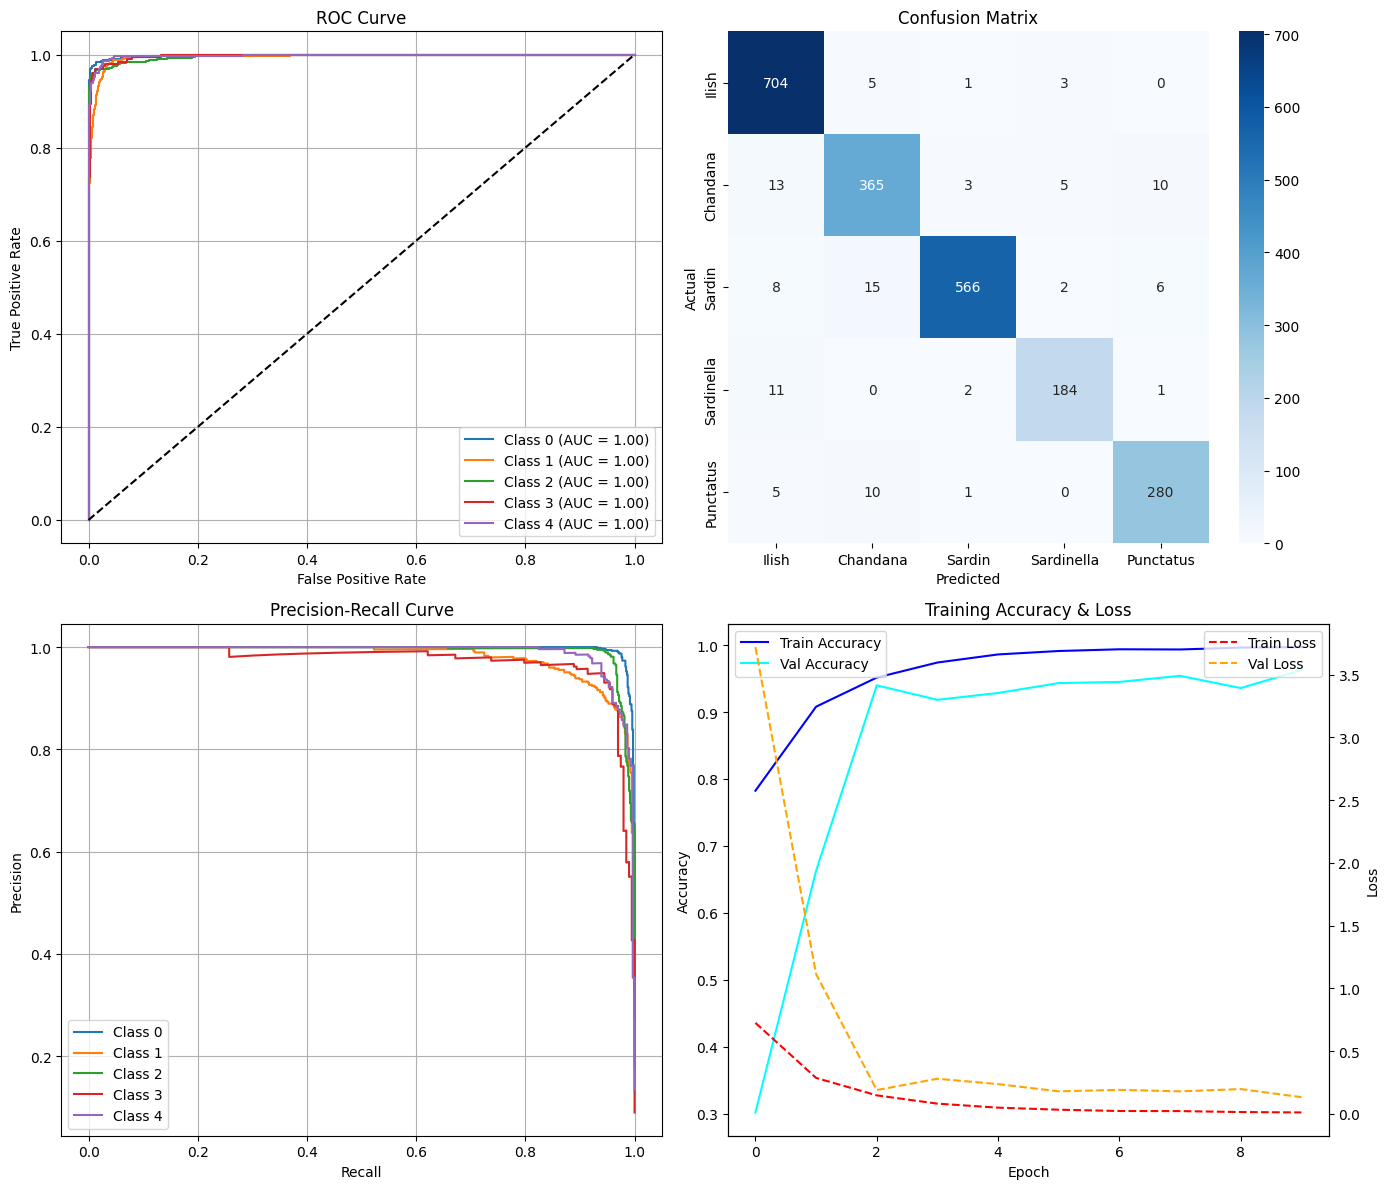


Final Model Performance:
Test Accuracy: 0.9541
F1 Score: 0.9541
Final predictions evaluated.


In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']


# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)  # Adjusted patience
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a base CNN model
def create_base_cnn_model(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Ensure dataset variables exist
# (You need to define X_train_scaled, X_test_scaled, Y_train, Y_test before running)

# Create the CNN model
cnn_model = create_base_cnn_model()

# Train the model
print("Training CNN model...")
history_cnn = cnn_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Generate predictions
cnn_preds_prob = cnn_model.predict(X_test_scaled)
cnn_preds = np.argmax(cnn_preds_prob, axis=1)

# Visualization function
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history, class_labels):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # ROC Curve
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        axes[0, 0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    axes[0, 0].plot([0, 1], [0, 1], 'k--')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axes[0, 1])
    axes[0, 1].set_title('Confusion Matrix')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Actual')

    # Precision-Recall Curve
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        axes[1, 0].plot(recall, precision, label=f'Class {i}')
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Training Accuracy & Loss Curves
    ax2 = axes[1, 1].twinx()
    axes[1, 1].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    axes[1, 1].plot(history.history['val_accuracy'], label='Val Accuracy', color='cyan')
    ax2.plot(history.history['loss'], label='Train Loss', linestyle='dashed', color='red')
    ax2.plot(history.history['val_loss'], label='Val Loss', linestyle='dashed', color='orange')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')
    axes[1, 1].set_title('Training Accuracy & Loss')
    axes[1, 1].legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, cnn_preds, cnn_preds_prob, history_cnn, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, cnn_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, cnn_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

#ResNet50

Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7870 - loss: 0.5969
Epoch 1: val_loss improved from inf to 0.11229, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 114s 175ms/step - accuracy: 0.7875 - loss: 0.5957 - val_accuracy: 0.9714 - val_loss: 0.1123 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9801 - loss: 0.0674
Epoch 2: val_loss improved from 0.11229 to 0.06313, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.9801 - loss: 0.0674 - val_accuracy: 0.9791 - val_loss: 0.0631 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9903 - loss: 0.0352
Epoch 3: val_loss improved from 0.06313 to 0.04875, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.9903 - loss: 0.0352 - val_accuracy: 0.9886 - val_loss: 0.0487 - learning_rate: 1.0000e-04
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step -

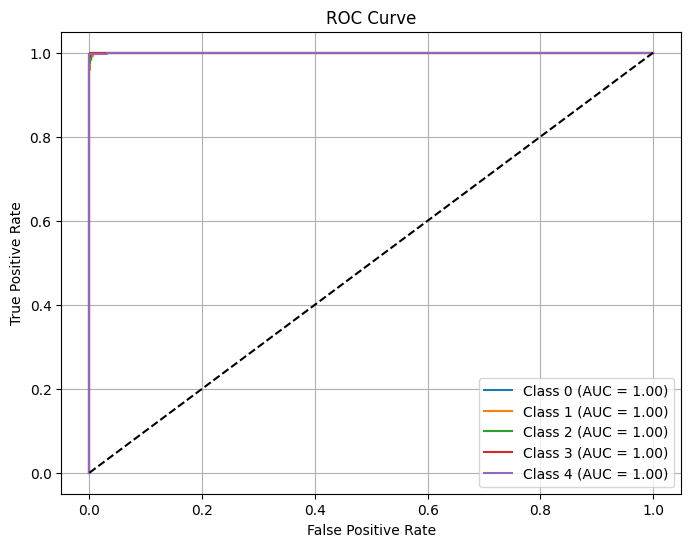

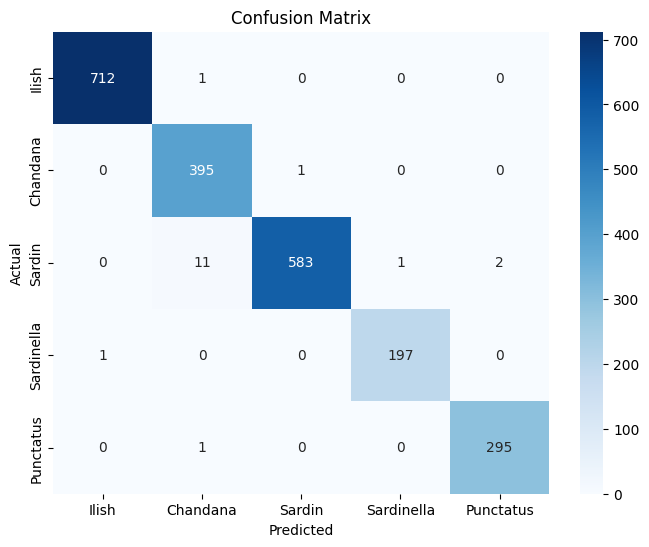

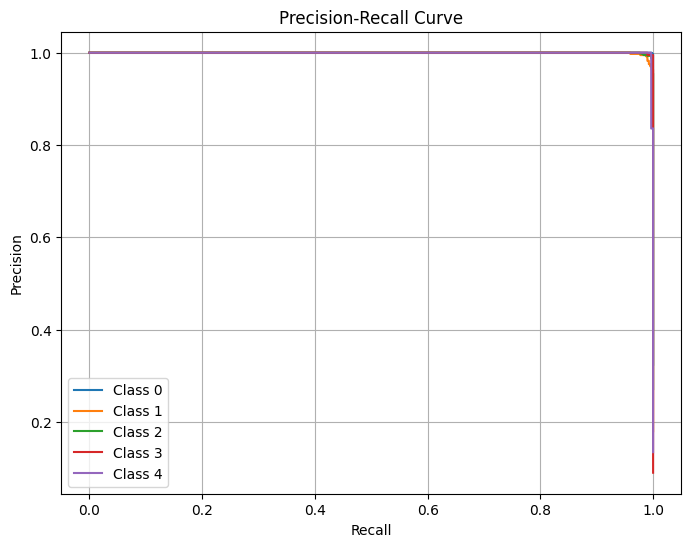

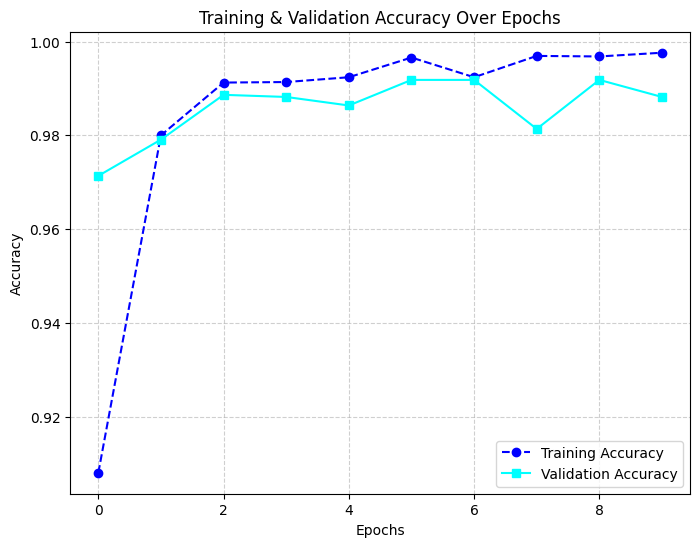

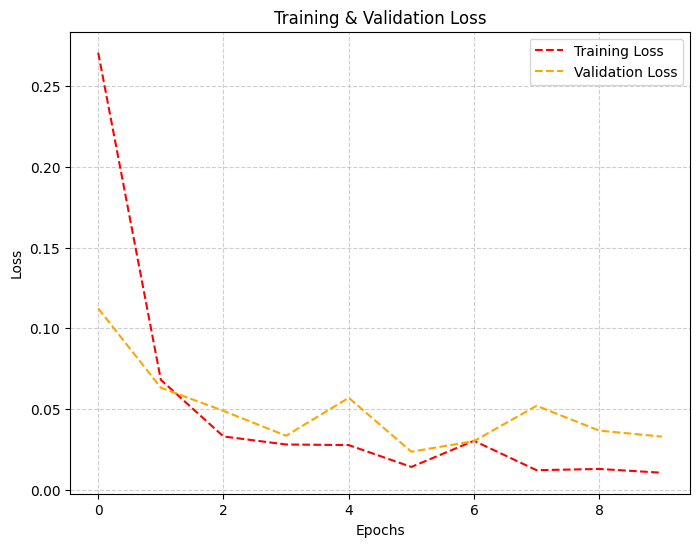

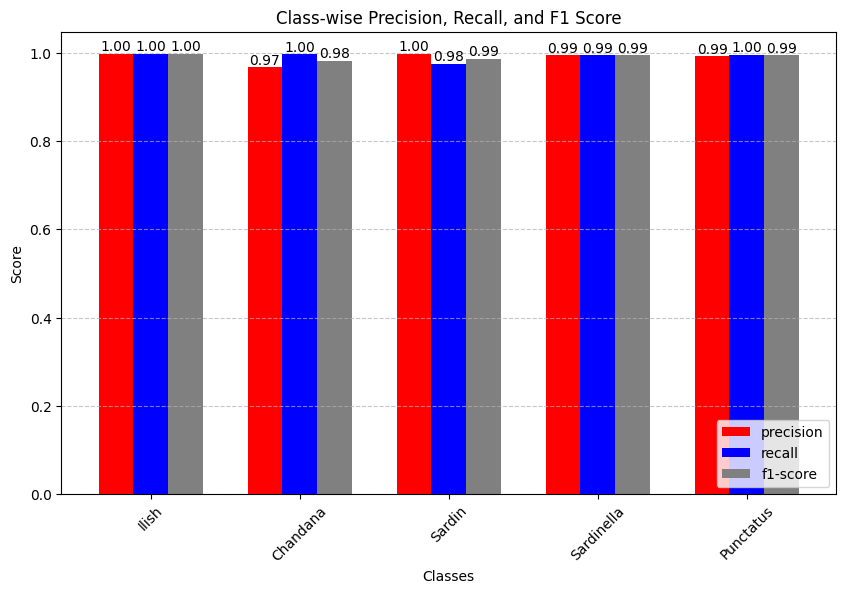


Final Model Performance:
Test Accuracy: 0.9918
F1 Score: 0.9918
Final predictions evaluated.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

model.save('model_resnet.keras')

Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6184 - loss: 1.0479
Epoch 1: val_loss improved from inf to 0.19169, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.6190 - loss: 1.0464 - val_accuracy: 0.9414 - val_loss: 0.1917 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9167 - loss: 0.2566
Epoch 2: val_loss improved from 0.19169 to 0.11753, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.9167 - loss: 0.2565 - val_accuracy: 0.9591 - val_loss: 0.1175 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9412 - loss: 0.1718
Epoch 3: val_loss improved from 0.11753 to 0.09439, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.9412 - loss: 0.1717 - val_accuracy: 0.9686 - val_loss: 0.0944 - learning_rate: 1.0000e-04
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accurac

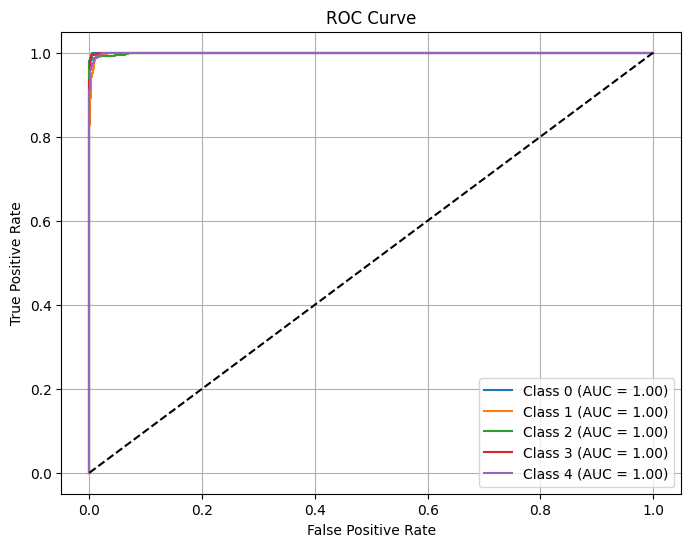

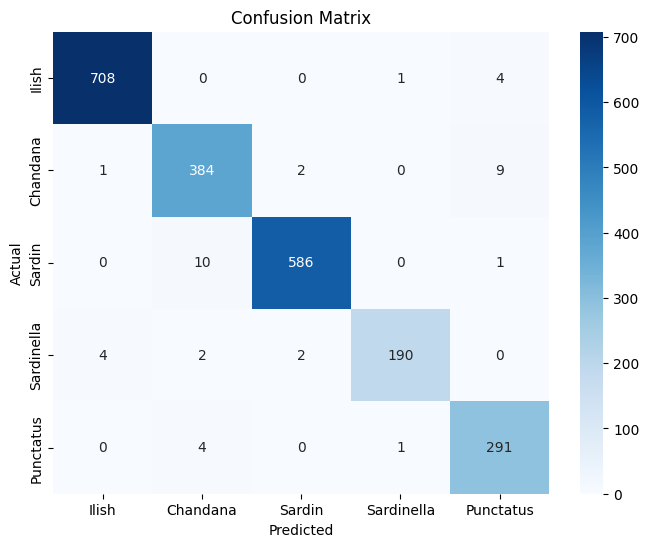

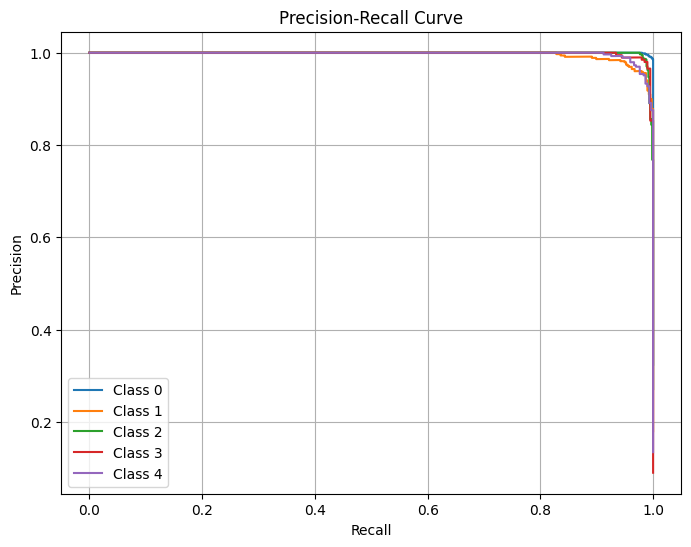

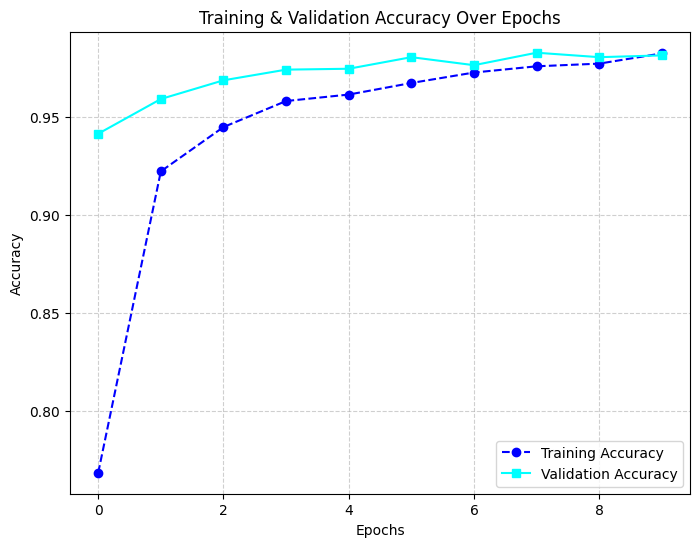

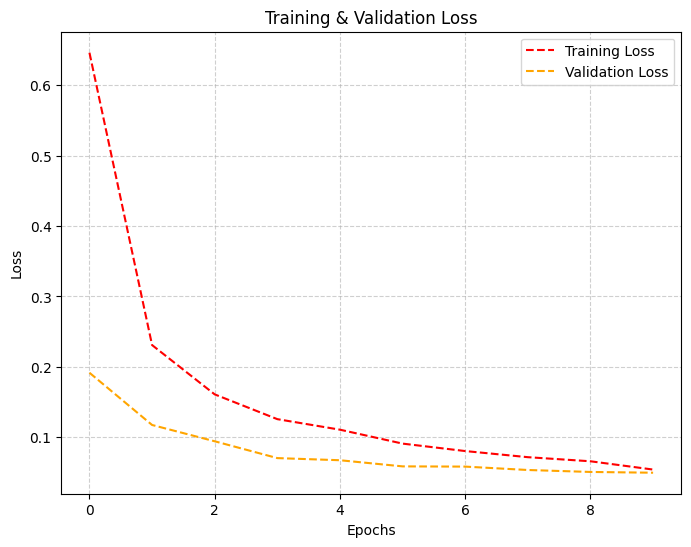

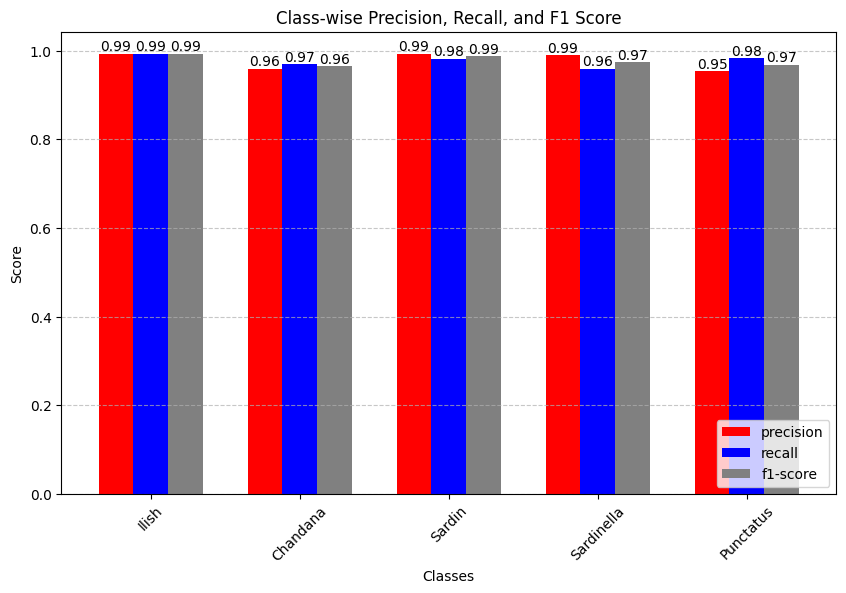


Final Model Performance:
Test Accuracy: 0.9814
F1 Score: 0.9814
Final predictions evaluated.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers:
    layer.trainable = False

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6188 - loss: 1.0592
Epoch 1: val_loss improved from inf to 0.07323, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 126s 130ms/step - accuracy: 0.6195 - loss: 1.0573 - val_accuracy: 0.9755 - val_loss: 0.0732 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9653 - loss: 0.1058
Epoch 2: val_loss improved from 0.07323 to 0.04252, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9653 - loss: 0.1058 - val_accuracy: 0.9864 - val_loss: 0.0425 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9803 - loss: 0.0563
Epoch 3: val_loss improved from 0.04252 to 0.02860, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9803 - loss: 0.0563 - val_accuracy: 0.9877 - val_loss: 0.0286 - learning_rate: 1.0000e-04
Epoch 4/1

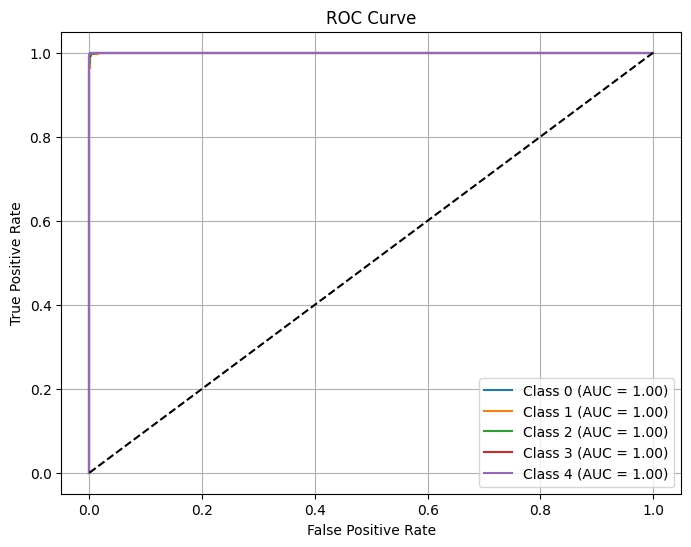

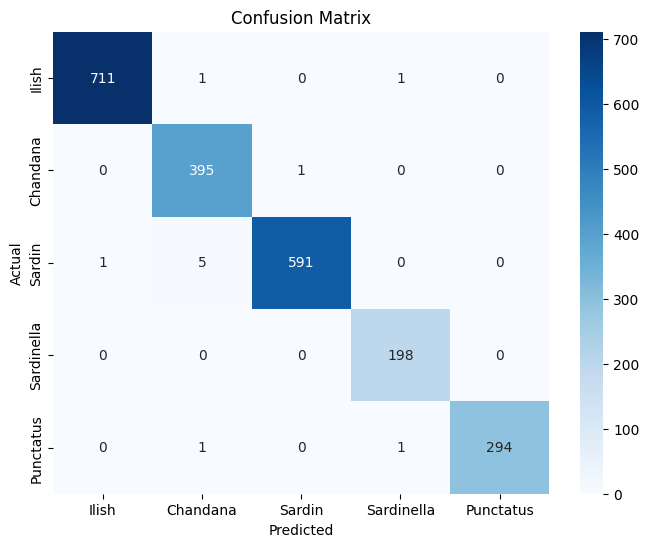

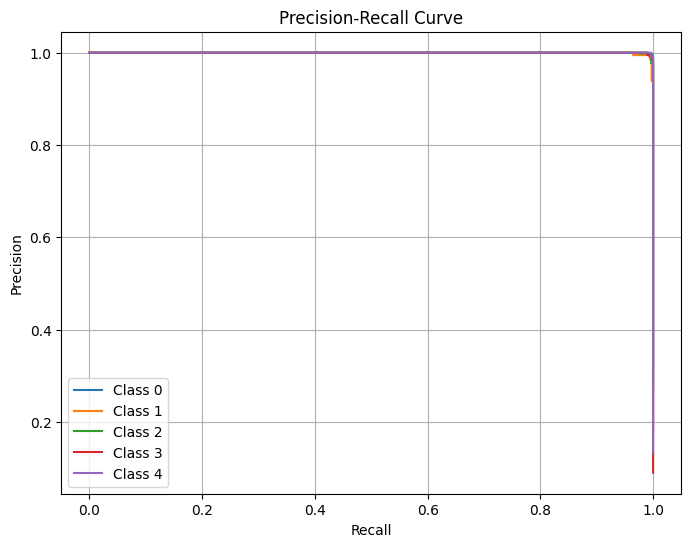

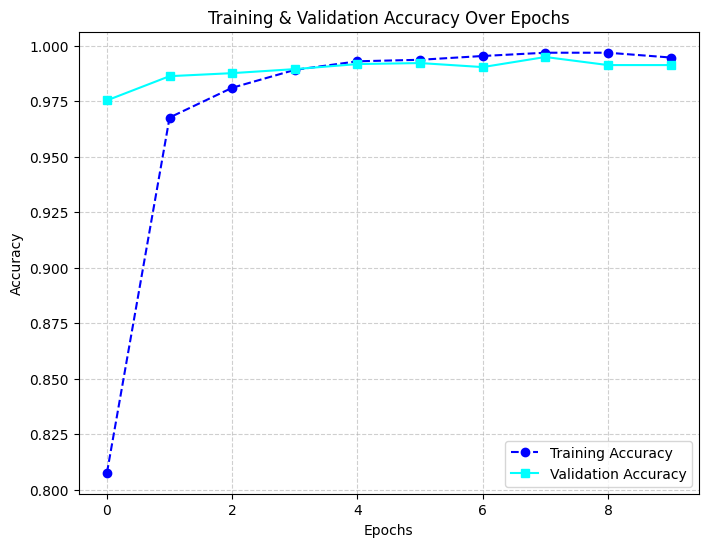

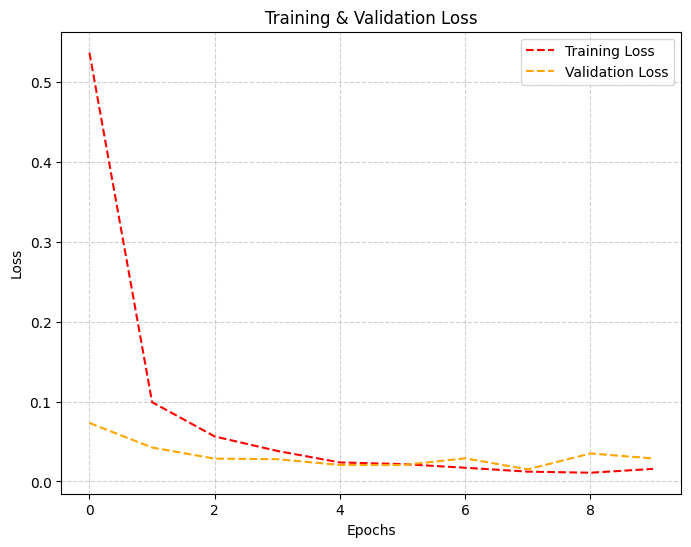

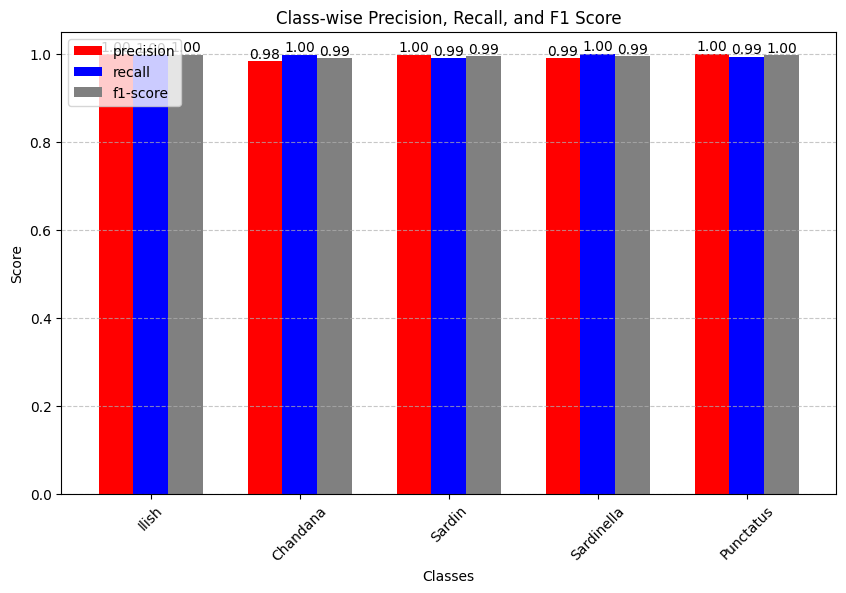


Final Model Performance:
Test Accuracy: 0.9950
F1 Score: 0.9950
Final predictions evaluated.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#InceptionV3

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7387 - loss: 0.7286
Epoch 1: val_loss improved from inf to 0.11232, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 123s 144ms/step - accuracy: 0.7392 - loss: 0.7272 - val_accuracy: 0.9636 - val_loss: 0.1123 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9701 - loss: 0.0883
Epoch 2: val_loss improved from 0.11232 to 0.05392, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9701 - loss: 0.0883 - val_accuracy: 0.9832 - val_loss: 0.0539 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9864 - loss: 0.0412
Epoch 3: val_loss improved from 0.05392 to 0.03985, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9855 - val_loss: 0.0398 - learning_rate: 1.0000e-04
Epoch 4/1

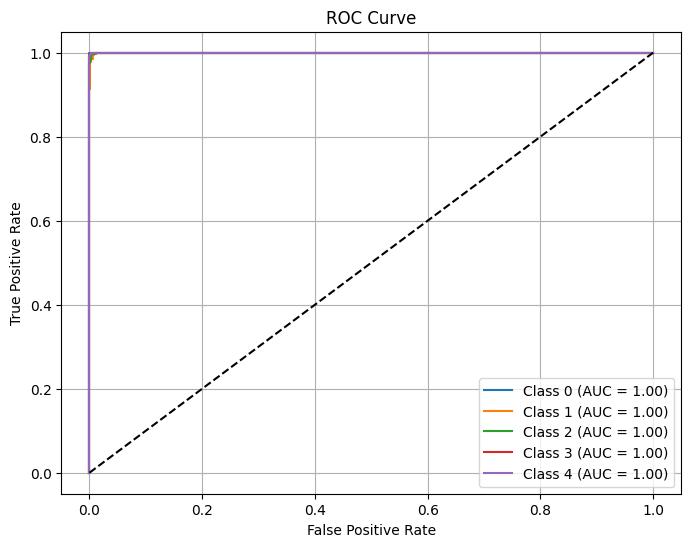

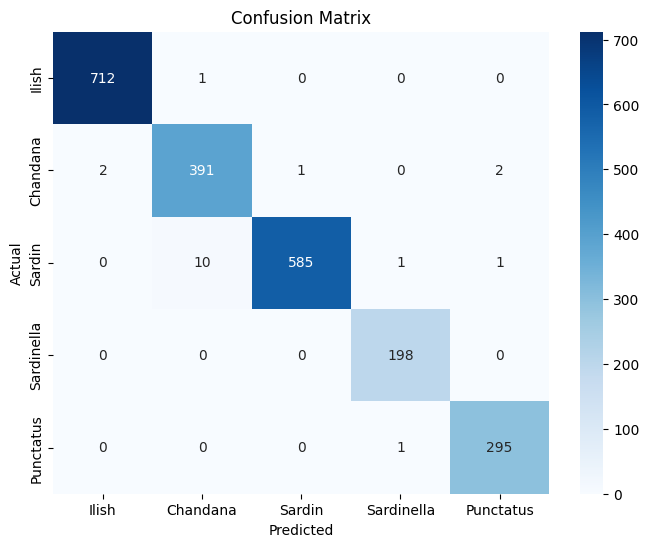

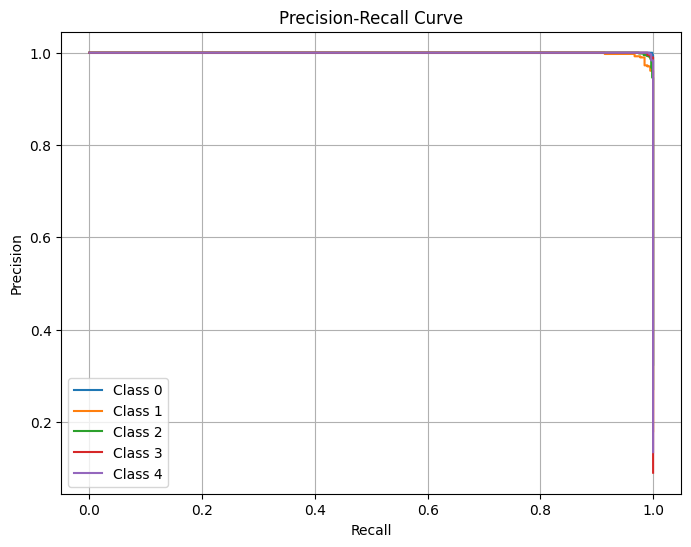

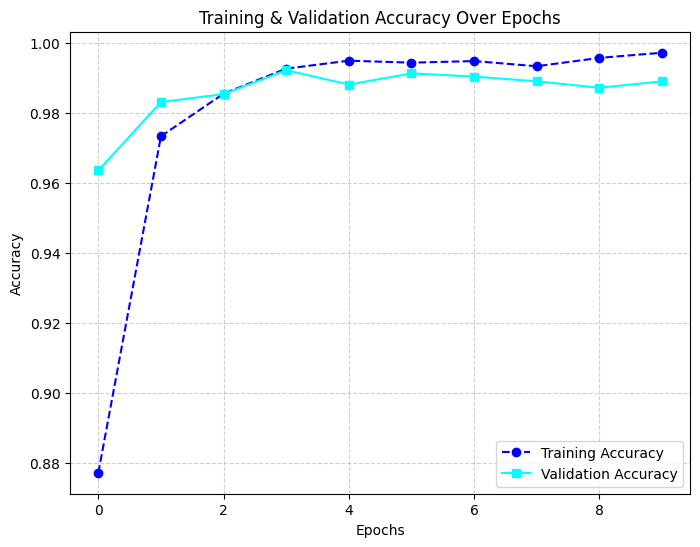

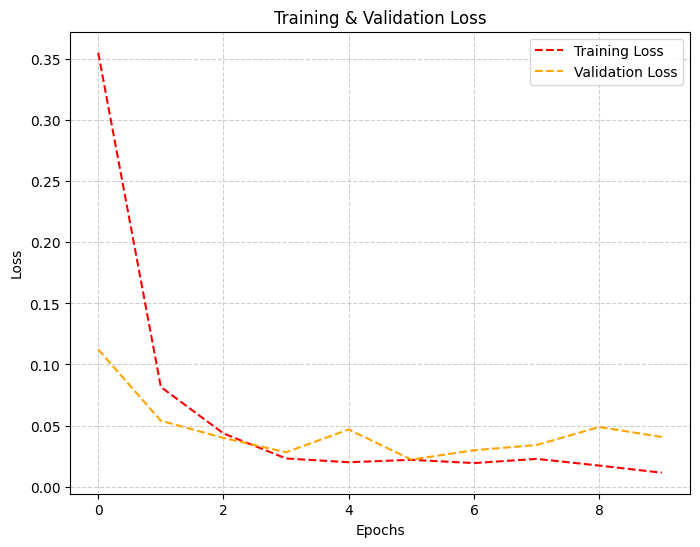

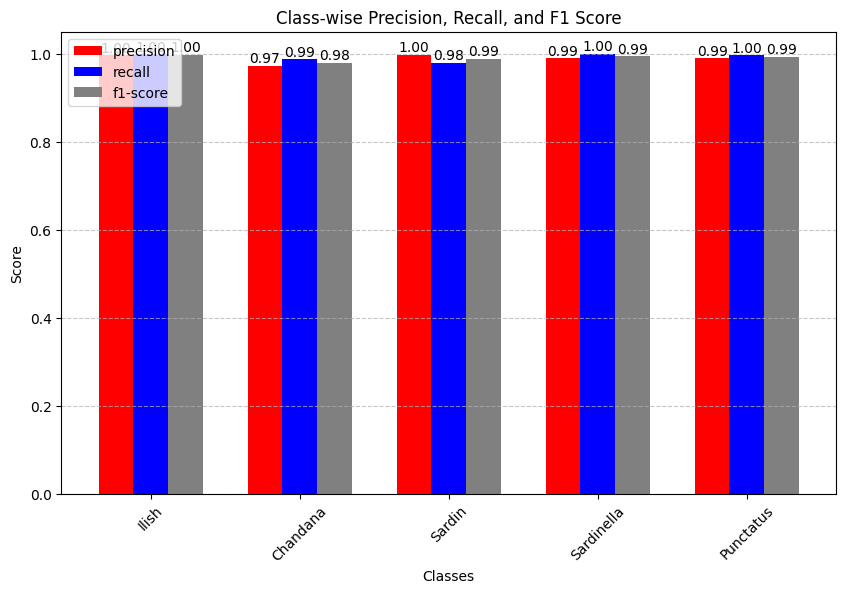


Final Model Performance:
Test Accuracy: 0.9914
F1 Score: 0.9914
Final predictions evaluated.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#MobileNetV2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6957 - loss: 0.8698
Epoch 1: val_loss improved from inf to 2.53476, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.6963 - loss: 0.8682 - val_accuracy: 0.4705 - val_loss: 2.5348 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9681 - loss: 0.0940
Epoch 2: val_loss improved from 2.53476 to 0.68906, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9681 - loss: 0.0939 - val_accuracy: 0.7755 - val_loss: 0.6891 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9778 - loss: 0.0621
Epoch 3: val_loss improved from 0.68906 to 0.16901, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9778 - loss: 0.0620 - val_accuracy: 0.9377 - val_loss: 0.1690 - learning_rate: 1.0000e-04
Epoch 4/10
27

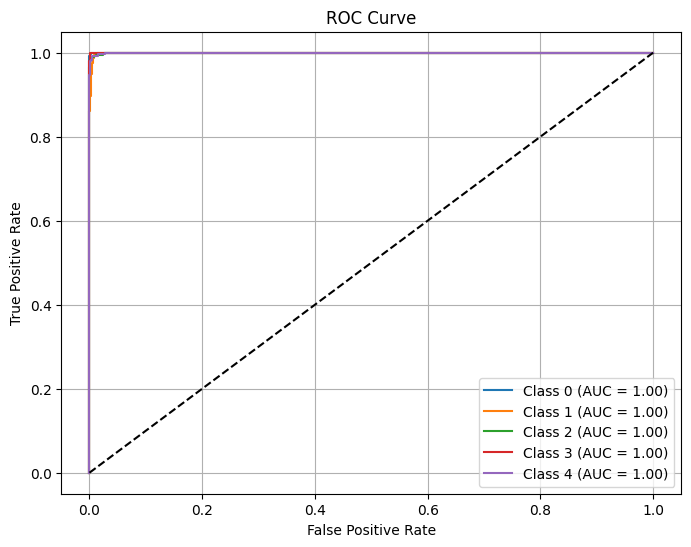

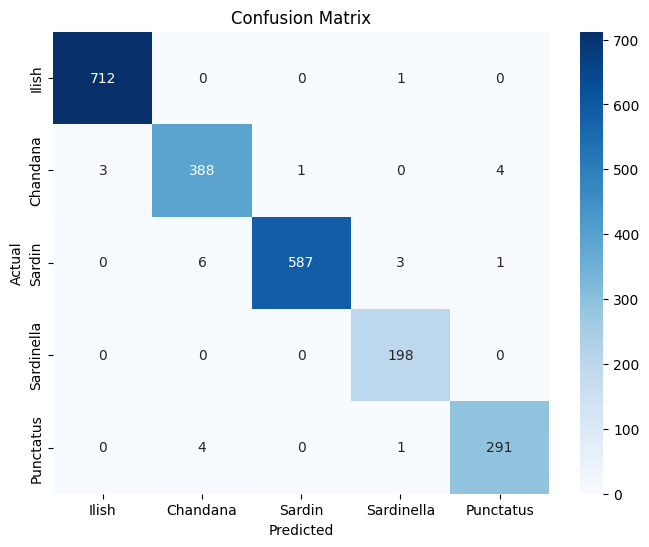

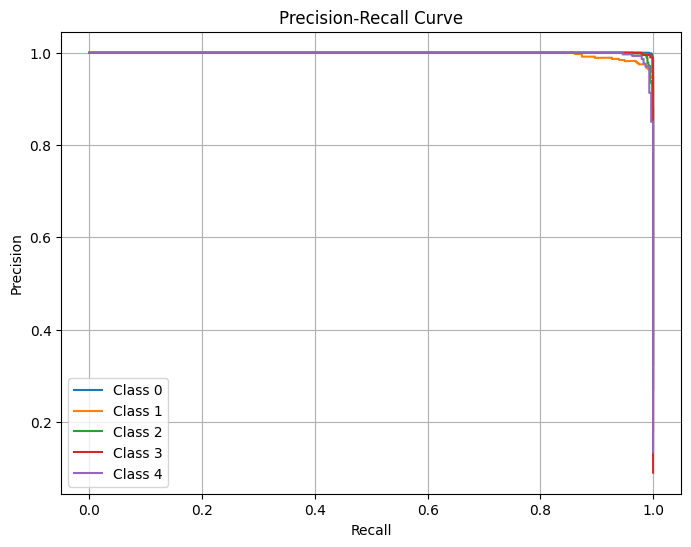

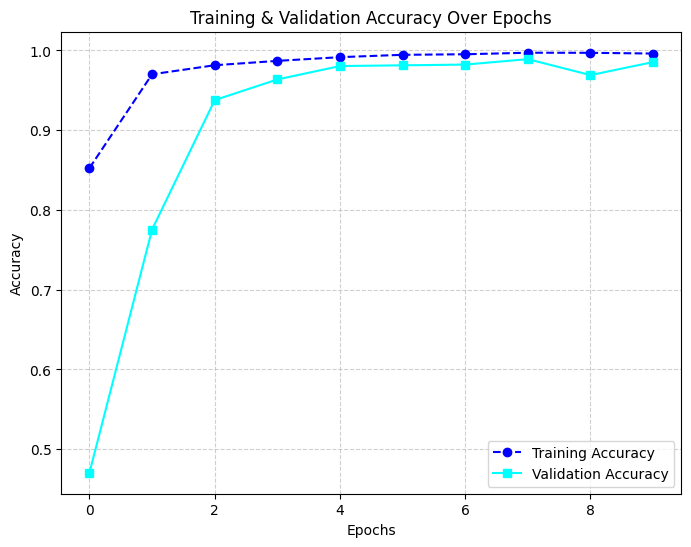

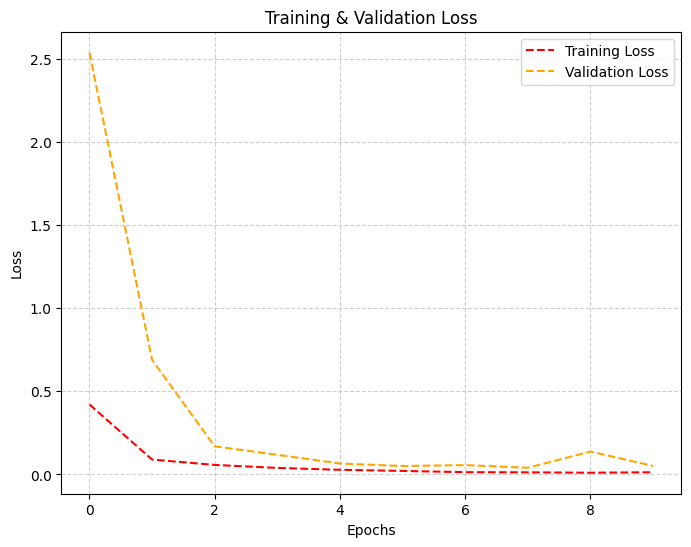

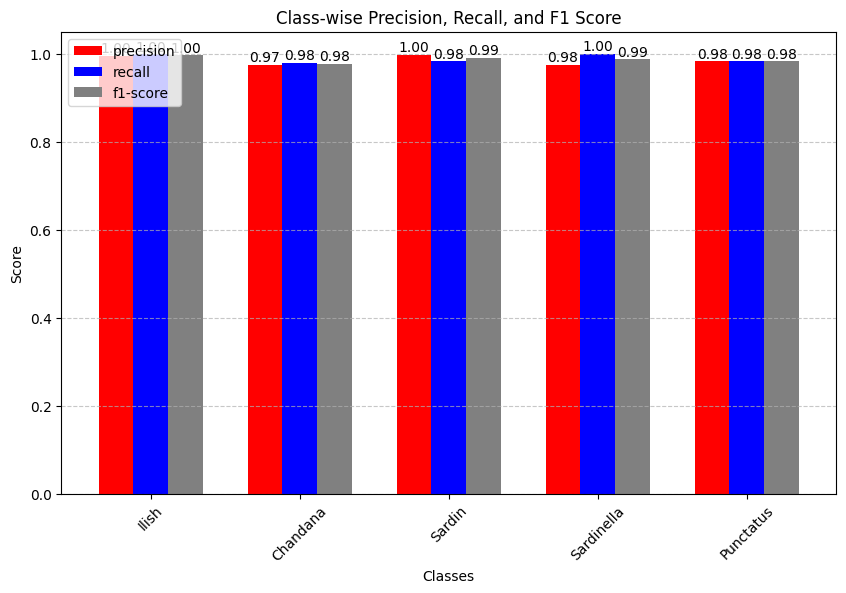


Final Model Performance:
Test Accuracy: 0.9891
F1 Score: 0.9891
Final predictions evaluated.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#VGG-19

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5926 - loss: 1.1512
Epoch 1: val_loss improved from inf to 1.45339, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 140s 374ms/step - accuracy: 0.5932 - loss: 1.1496 - val_accuracy: 0.6395 - val_loss: 1.4534 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9245 - loss: 0.2497
Epoch 2: val_loss improved from 1.45339 to 0.85835, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9246 - loss: 0.2496 - val_accuracy: 0.7586 - val_loss: 0.8584 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9645 - loss: 0.1218
Epoch 3: val_loss improved from 0.85835 to 0.21431, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9645 - loss: 0.1218 - val_accuracy: 0.9318 - val_loss: 0.2143 - learning_rate: 1.0000e-04
Epoc

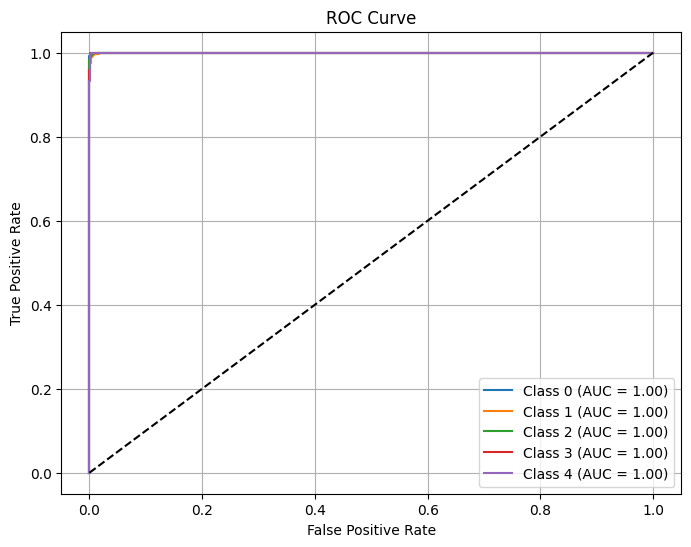

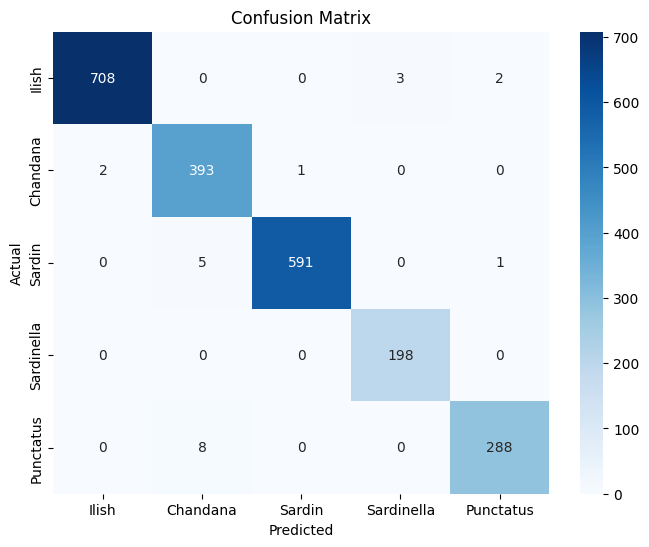

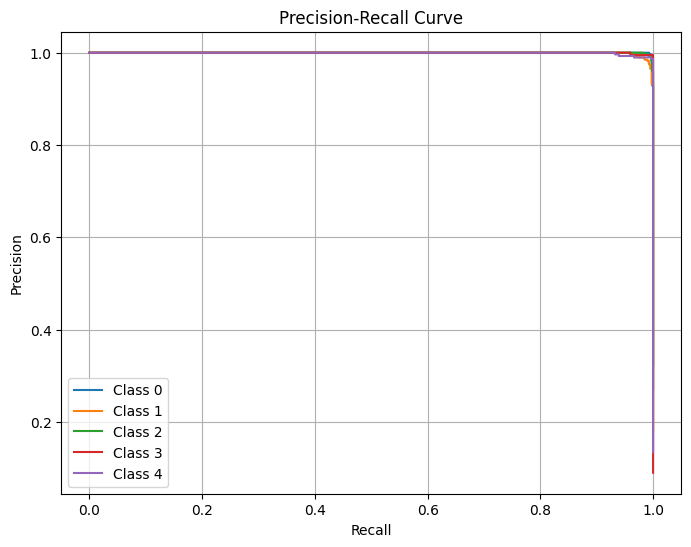

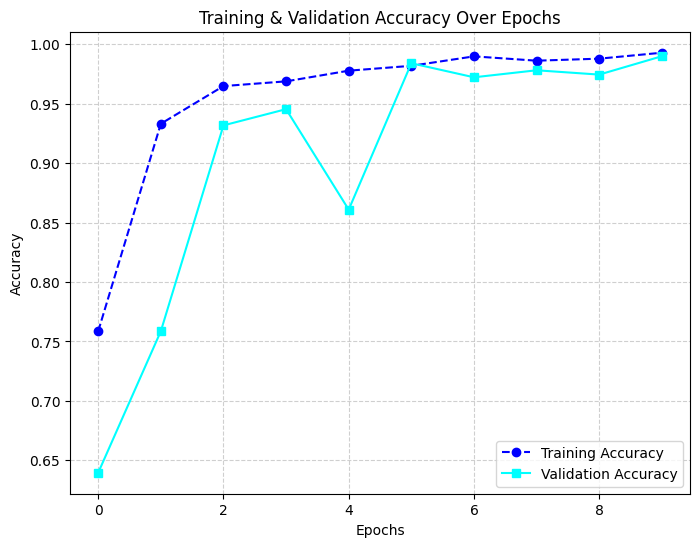

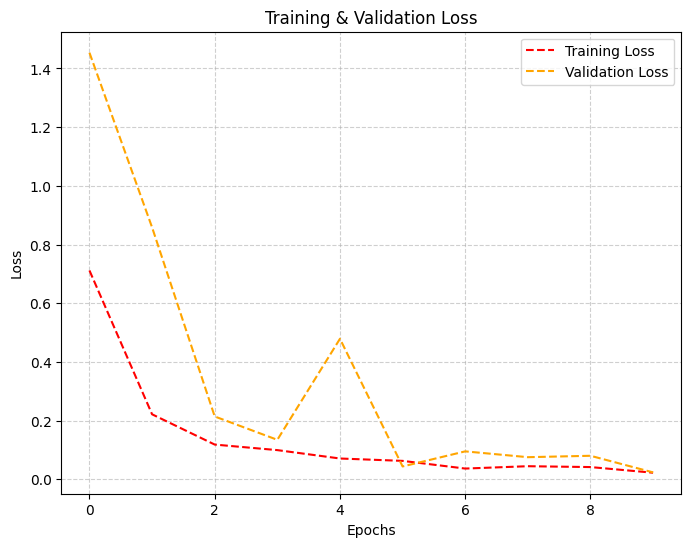

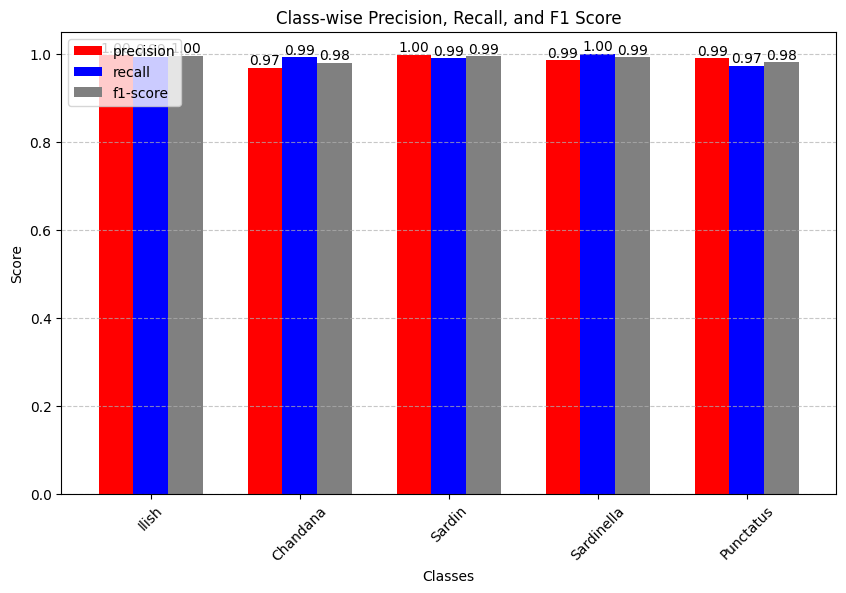


Final Model Performance:
Test Accuracy: 0.9900
F1 Score: 0.9900
Final predictions evaluated.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

In [ ]:
# model.save('efficientnetb0.h5')

#End